In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

In [6]:
df = pd.read_pickle('./data/reconstructed_dated.pkl')
df_latent = pd.read_pickle('./data/3dim_latent_space_data.pkl')
df['date'] = pd.to_datetime(df['date'])
outliers = df_latent.s.unique()
list_col= ["closing_balance","reconstructed_balance"]

Dropdown(description='Outlier:', index=1, options=(9.0, 212.0, 266.0, 456.0, 1132.0, 2915.0, 3521.0, 4514.0, 5…

<Figure size 720x1080 with 0 Axes>

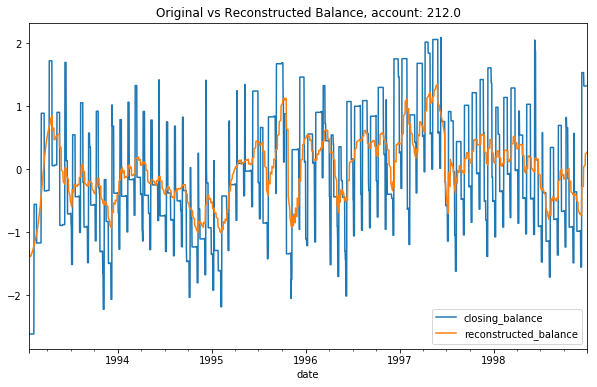

<Figure size 720x1080 with 0 Axes>

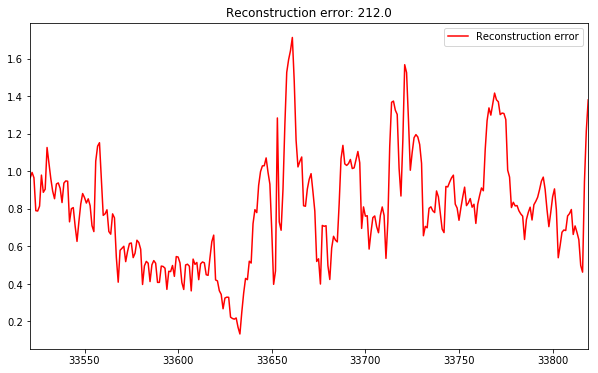

In [7]:
out = widgets.Output()
outlier_dd = widgets.Dropdown(options = outliers, value=outliers[0], description='Outlier:')
display(outlier_dd)

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(outlier_dd)
        account = change['new']
        plt.figure()
        df_temp = df[df["account"]==account]
        df_temp.plot(x='date', y=list_col, title="Original vs Reconstructed Balance, account: " + str(account))
        plt.show()
        
        plt.figure()
        df_latent[df_latent["s"]==account].plot(y='Reconstruction error', title="Reconstruction error: " + str(account), color="red")
        plt.show()

outlier_dd.observe(on_change)